In [1]:
from line_solver import *
from scipy import optimize
import numpy as np

In [2]:
model = Network('LoadBalCQN')
# Block 1: nodes
delay = Delay(model, 'Think')
queue1 = Queue(model, 'Queue1', SchedStrategy.PS)
queue2 = Queue(model, 'Queue2', SchedStrategy.PS)
# Block 2: classes
cclass = ClosedClass(model, 'Job1', 16, delay)
delay.set_service(cclass, Exp(1))
queue1.set_service(cclass, Exp(0.75))
queue2.set_service(cclass, Exp(0.50))
P = model.init_routing_matrix()
P.set(cclass, cclass, queue1, delay, 1.0)
P.set(cclass, cclass, queue2, delay, 1.0)
model.link(P)

def objFun(p):
    P.set(cclass, cclass, delay, queue1, p)
    P.set(cclass, cclass, delay, queue2, 1.0 - p)
    model.relink(P)
    # Block 4: solution
    R = MVA(model, method='exact', verbose=False).avg_sys_resp_t()    
    return R[0]

In [3]:
p_opt = optimize.fminbound(objFun, 0, 1)
print(p_opt)

0.6104878504366773


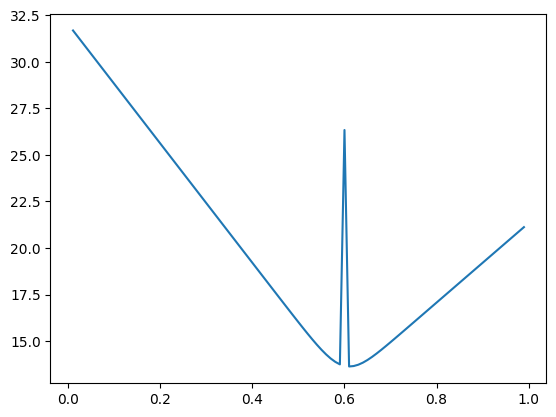

In [4]:
import matplotlib.pyplot as plt
y = []
x = np.arange(0.01,1,0.01)
y = np.array([objFun(xi) for xi in x])
plt.plot(x, y)